## <p style="text-align: center;">SDG 6 visualizations</p>
### <p style="text-align: center;">Davide Varricchio 941842</p>

Sustainable Development Goal 6: Ensure access to water and sanitation for all

First, some definitions
* Improved water source:  a source that has the potential to deliver safe water by nature of their design. They include: piped water, boreholes or tubewell, protected dug wells or springs, and packaged water. Safely managed, basic and limited are improved sources.
* Safely managed: 
    * an Improved source located on premises
    * available when needed
    * free  from contamination
* Basic: 
    * an improved source that misses a 'Safely managed' criteria 
    * under 30 minutes to collect (roundtrip)
* Limited: 
    * an improved source that misses a 'Safely managed' criteria 
    * over 30 minutes to colelct (roundtrip)
* Unimproved: water from an unprotected dug well or spring
* Surface water: water directly from river, dam, lake, pond or canal

## SDG 6.1
> By 2030, achieve universal and equitable access to safe and affordable drinking water for all
> -- <cite>United Nations sdg 6.1, https://sdgs.un.org/goals/goal6</cite>

As of 2020, one in four people do not have access to safe drinking water

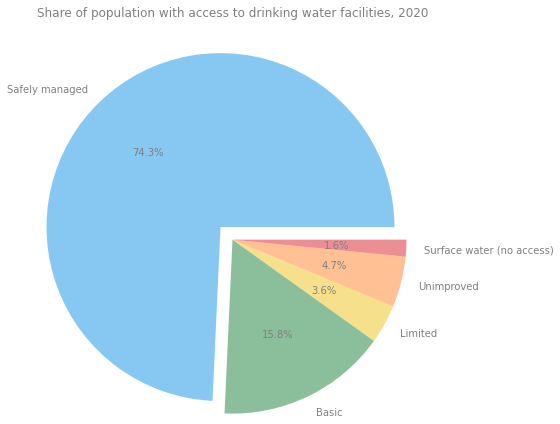

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
#plot style
plt.rcParams['text.color'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.edgecolor'] = 'grey'
#
wat_and_san = pd.read_csv('data/Water and Sanitation (WHO WASH, 2021).csv')
df_2020  = wat_and_san[wat_and_san['Year']== 2020]
wat_classes = ['wat_sm','wat_bas_minus_sm','wat_lim','wat_unimp','wat_sur']
drinking_wat = wat_and_san[['Entity','Year']+wat_classes]
drinking_wat_2020 = df_2020[['Entity']+wat_classes]
world_2020 = drinking_wat_2020[drinking_wat_2020['Entity'] == 'World']
sizes = world_2020.values[0][1:]
labels = ['Safely managed','Basic','Limited','Unimproved','Surface water (no access)']
explode = [0.2,0,0,0,0]
colors = ['#1192e8','#198038','#f1c21b','#ff832b','#da1e28']
p=plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,radius=2,textprops=dict(color='grey'))
for i in range(len(p[0])):
    p[0][i].set_alpha(0.5)
plt.title('Share of population with access to drinking water facilities, 2020',color='grey',y= 1.5)
plt.show()


Source: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

As expectable, not everyone in the world is in the same condition: some regions are in worse state, and there is an evident correlation with income

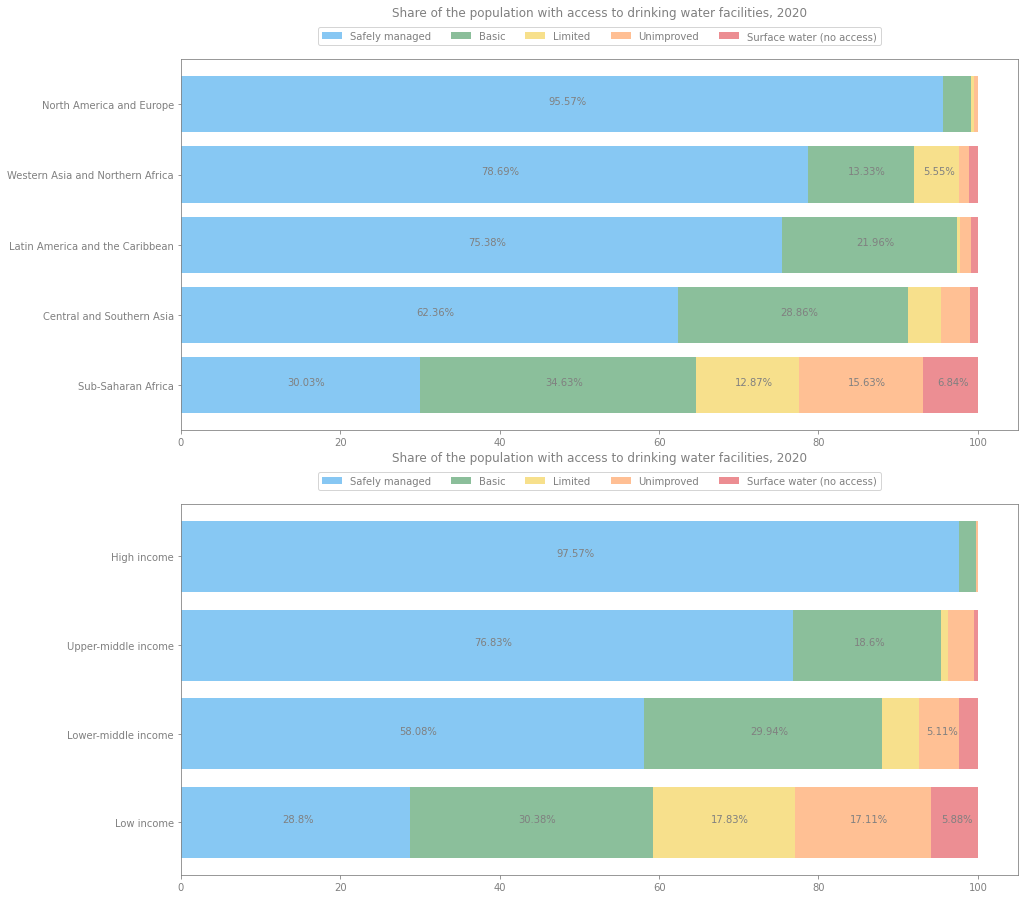

In [3]:
import numpy as np
region_filter = ['North America and Europe','Western Asia and Northern Africa','Latin America and the Caribbean','Central and Southern Asia','Sub-Saharan Africa']
income_filter = ['High income','Upper-middle income','Lower-middle income','Low income']
income = drinking_wat[drinking_wat['Entity'].isin(income_filter)].sort_values('wat_sm')
regions = drinking_wat[drinking_wat['Entity'].isin(region_filter)].sort_values('wat_sm')
income_2020 = income[income['Year'] == 2020]
regions_2020 = regions[regions['Year'] == 2020]
fig, ax = plt.subplots(2,1,figsize=(15,15))
dfs = (regions_2020,income_2020)
for j in range(2):
    df = dfs[j]
    for i in range(5):
        if i == 0:
            previous_bar = None
        if i == 1:
            previous_bar = np.array(df[wat_classes[0]])
        if i > 1:
            previous_bar += np.array(df[wat_classes[i-1]])
        b = ax[j].barh(df['Entity'].values, df[wat_classes[i]],color=colors[i], left = previous_bar,alpha=0.5,label=labels[i])
        ax[j].legend(loc='upper center',ncol=5,labelcolor='grey',bbox_to_anchor=(0.5,1.1))
        ax[j].set_title('Share of the population with access to drinking water facilities, 2020',y= 1.1)
        
        for bar in b.patches:
            width = bar.get_width()
            if width>5:
                ax[j].annotate('{}%'.format(width.round(2)),
                xy=(bar.get_x() + width/2, bar.get_y()+bar.get_height()/2),
                xytext=(-13, 0),
                textcoords="offset points",
                color='grey') 
plt.show()

https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

In [4]:
import plotly.express as px
iso = pd.read_csv('data/access-drinking-water-stacked.csv')[['Entity','Code']].drop_duplicates()
def add_iso3_from_entity(df):
    return pd.merge(df, iso, how='inner', on = 'Entity')
drinking_wat_2020_iso = add_iso3_from_entity(drinking_wat_2020)
fig = px.choropleth(drinking_wat_2020_iso,locations='Code',color="wat_sm",color_continuous_scale=px.colors.sequential.Bluyl,
title='Share of the population with access to safely managed drinking water,2020',hover_name='Entity',labels={'wat_sm':'%'})
fig.update_layout(height=700,title_x = 0.5)

fig.show()

Source: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

Although income is an important determinant, the range of levels of access which occur across countries of similar prosperity further support the suggestion that there are other important governance and infrastructural factors which contribute. In the scatter plot below we can see how countries with similar GDP can have very different access to safely managed water. The differences get lower with very high income.

Correlation coefficient: 0.7235606577008413


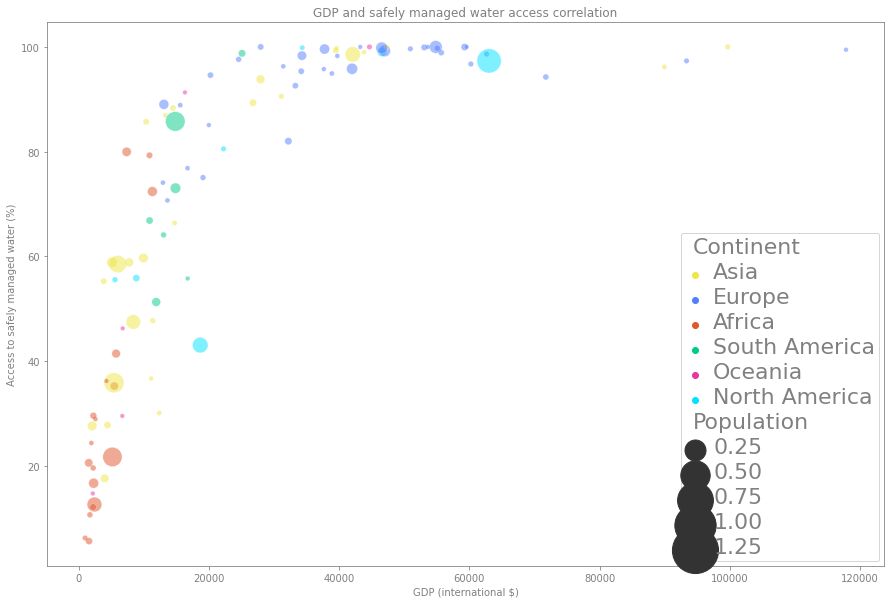

In [5]:
import pycountry
import pycountry_convert as pc
import seaborn as sns
def add_continent_from_iso3(df,iso_column):
    df['Continent'] = [pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(x))) for x in df[iso_column].to_list()]
    return df 
world_bank_data_databank = pd.read_csv('data/gdp_per_capita_and_pop.csv')
population = world_bank_data_databank[world_bank_data_databank['Series Name'] == 'Population, total']
gdp = world_bank_data_databank[world_bank_data_databank['Series Name']== 'GDP per capita, PPP (current international $)']
gdp_pop_df = gdp.merge(population,on='Country Name')
gdp_pop_df.rename(columns={'Country Name':'Entity','2020 [YR2020]_x':'GDP','2020 [YR2020]_y':'Population'},inplace=True)
gdp_pop_wat = gdp_pop_df.merge(drinking_wat_2020,on='Entity')
#removing missing values
gdp_pop_wat = gdp_pop_wat[gdp_pop_wat['GDP'] != '..']
#converting types
gdp_pop_wat['GDP'] = gdp_pop_wat['GDP'].astype(float)
gdp_pop_wat['Population'] = gdp_pop_wat['Population'].astype(float)

codes = []
for country in pycountry.countries:
    codes.append(country.alpha_3)
gdp_pop_wat = gdp_pop_wat[gdp_pop_wat['Country Code_x'].isin(codes)]

add_continent_from_iso3(gdp_pop_wat,'Country Code_x')  

c_colors = {'Asia':'#efe645','Europe':'#537eff','Africa':'#e1562c','South America':'#00cb85','Oceania':'#e935a1','North America':'#00e3ff'}
scatter = sns.scatterplot(data=gdp_pop_wat, x="GDP", y="wat_sm", size="Population", hue="Continent", alpha=0.5, sizes=(20,2400),palette=c_colors)
scatter.figure.set_size_inches(15,10)
scatter.set_title('GDP and safely managed water access correlation')

plt.setp(scatter.get_legend().get_texts(), fontsize='22')
plt.setp(scatter.get_legend().get_title(), fontsize='32')
scatter.set(ylabel= 'Access to safely managed water (%)',xlabel= 'GDP (international $)')
print("Correlation coefficient: "+ str(gdp_pop_wat['GDP'].corr(gdp_pop_wat['wat_sm'])))
plt.show()



A more detailed look at lower income countries

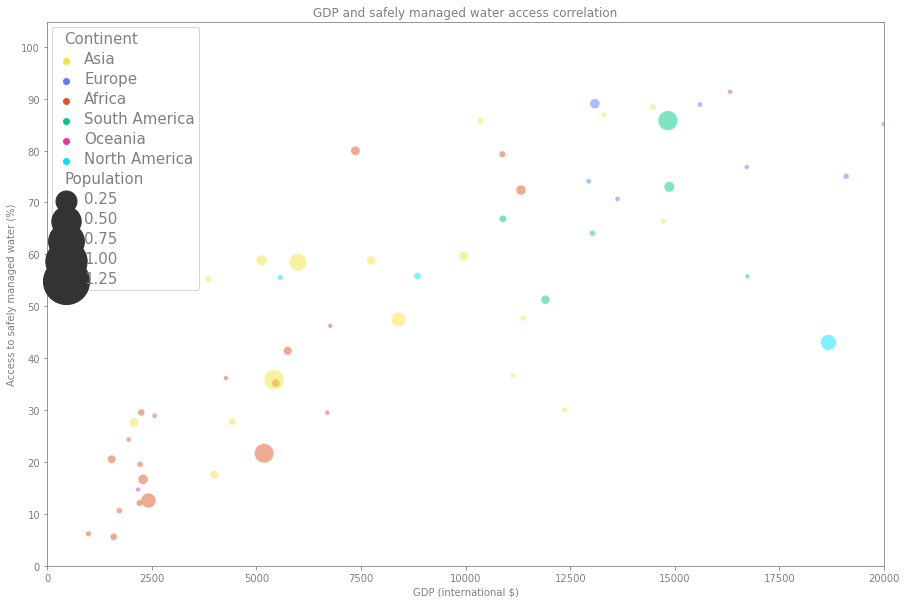

In [6]:
scatter_lim = sns.scatterplot(data=gdp_pop_wat, x="GDP", y="wat_sm", size="Population", hue="Continent", alpha=0.5, sizes=(20,2400),palette=c_colors)
scatter_lim.figure.set_size_inches(15,10)
scatter_lim.set_title('GDP and safely managed water access correlation')
scatter_lim.set_yticks(np.arange(0,101,10))
plt.setp(scatter_lim.get_legend().get_texts(), fontsize='15')
plt.setp(scatter_lim.get_legend().get_title(), fontsize='25')
scatter_lim.set(ylabel= 'Access to safely managed water (%)', xlabel= 'GDP (international $)')
scatter_lim.set_xlim(0,20000)
plt.show()

Sources:
* GDP and Population: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
* Water: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021) <br>
GDP per capita, PPP (current international $):This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor.   GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries

There can also be a difference in water access within the same country. The scatter plot below shows how a larger percentage of people have access to safely managed drinking water in urban areas compared to rural ones. When the dots are on the line, it means the percentages of rural and urban access are the same. In the majority of cases this doesn't happend, with the points landing above the line, thus indicating what stated above. The infrastructural challenges of developing water networks in rural areas is likely to play an important role in the situation. Also, urbanization is strongly related to economic growth, and we already enstablished a correlation with that in the plots above.

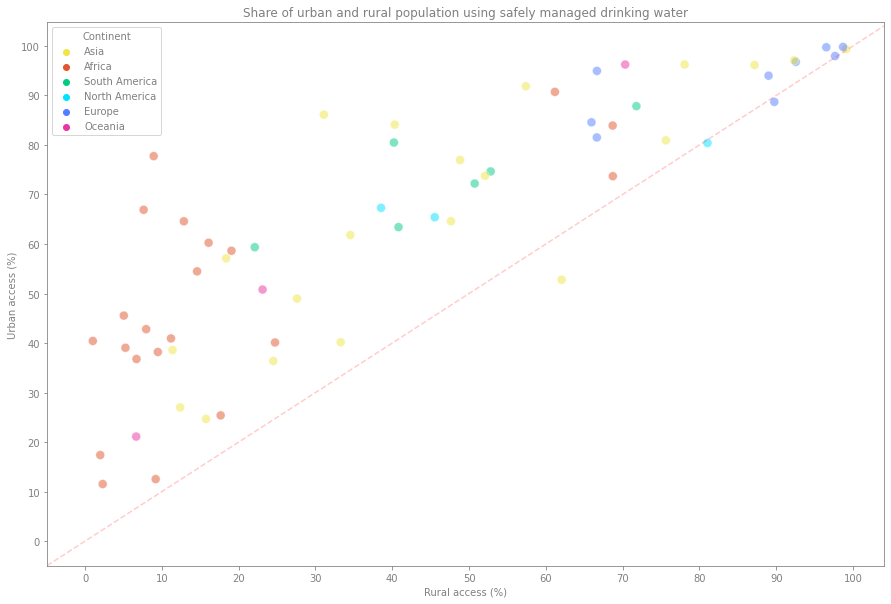

In [7]:
rural_filter = [f+'_rural' for f in wat_classes]
urban_filter = [f+'_urban' for f in wat_classes]
rural_2020 = df_2020[['Entity']+rural_filter]
rural_2020 = rural_2020[rural_2020['wat_sm_rural'].notna()]
rural_2020
urban_2020 = df_2020[['Entity']+urban_filter]
urban_2020 = urban_2020[urban_2020['wat_sm_urban'].notna()]
urban_2020
ur_ru_df = pd.merge(urban_2020,rural_2020,on='Entity')
ur_ru_df = add_iso3_from_entity(ur_ru_df)
ur_ru_df = ur_ru_df = ur_ru_df[ur_ru_df['Code'].isin(codes)]
ur_ru_df = add_continent_from_iso3(ur_ru_df,'Code')
ur_ru_scatter = sns.scatterplot(data = ur_ru_df,x = 'wat_sm_rural',y = 'wat_sm_urban',hue='Continent',palette=c_colors,alpha=0.5,s=80)
ur_ru_scatter.figure.set_size_inches(15,10)
ur_ru_scatter.set_title('Share of urban and rural population using safely managed drinking water')
ur_ru_scatter.set_yticks(np.arange(0,101,10))
ur_ru_scatter.set_xticks(np.arange(0,101,10))
ur_ru_scatter.set(ylabel= 'Urban access (%)', xlabel= 'Rural access (%)')
plt.axline([0,0],[1,1] , color='r',alpha = 0.2,linestyle='--')
plt.show()

Source: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

While the world has made progress in the last five years, this has been very slow. In 2015, when SDG started, only 70% of the population had safe drinking water. That means we've seen an increment of 4 percentage points over five years. At this rate we would only reach 82% by 2030. If we want to reach the target we have to more than triple the increment

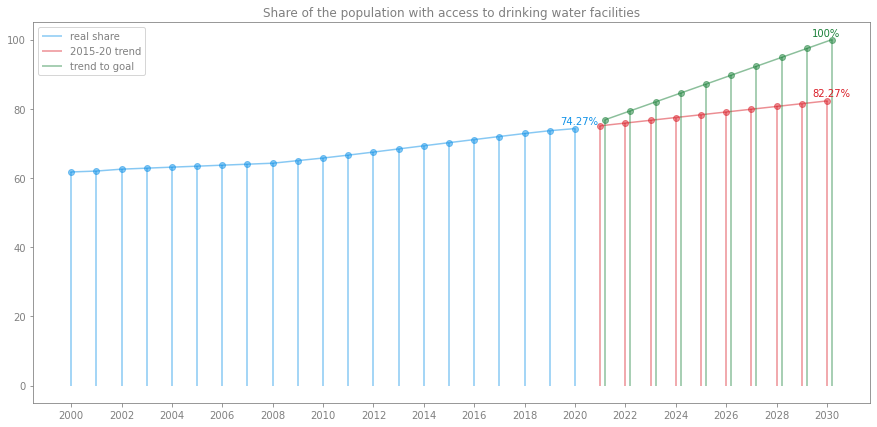

In [8]:

world = drinking_wat[drinking_wat['Entity'] == 'World']
years = np.arange(2000,2031,2)
world_2020_sm = world_2020['wat_sm'].values[0]
expected_years = np.arange(2021,2031,1)
goal_years = np.arange(2021.2,2031,1)
fig, ax = plt.subplots(figsize= (15,7))
def wat_access_trend(ax,sm_2020,year_increment,wat_years,wat_sm,title):
    expected = np.arange(sm_2020,sm_2020+(year_increment*11),year_increment)[1:]
    goal = np.linspace(sm_2020,100,num=11)[1:]
    r = ax.vlines(wat_years,0,wat_sm,colors=colors[0],alpha = 0.5,label='real share')
    ax.plot(wat_years,wat_sm,marker = 'o',color=colors[0],alpha = 0.5,linestyle='solid')
    ax.set_xticks(years)
    ax.vlines(expected_years,0,expected,colors=colors[-1],alpha = 0.5,label='2015-20 trend')
    ax.plot(expected_years,expected,marker = 'o',color=colors[-1],alpha = 0.5,linestyle='solid')
    ax.vlines(goal_years,0,goal,colors=colors[1],alpha = 0.5,label='trend to goal')
    ax.plot(goal_years,goal,marker = 'o',color=colors[1],alpha = 0.5,linestyle='solid')
    ax.legend()
    ax.annotate(f'{sm_2020}%',(2020,sm_2020),color = colors[0],
    xytext=(-15, 5),
    textcoords="offset points"
    )
    ax.annotate(f'{expected[-1].round(2)}%',(2030,expected[-1]),color = colors[-1],
    xytext=(-15, 5),
    textcoords="offset points",
    )
    ax.annotate(f'100%',(2030,goal[-1]),color = colors[1],
    xytext=(-15, 3),
    textcoords="offset points",
    )


    ax.set_title(title)
 
wat_access_trend(ax,world_2020_sm,0.8,world['Year'],world['wat_sm'],'Share of the population with access to drinking water facilities')

Source:  https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

### How bad is it?
Unsafe water is one of the top risk factors causing death worldwide. Besides, lack of access to safe water leads to malnutrition and poor sanitation, the latter is a leading risk factor for infectious diseases. 

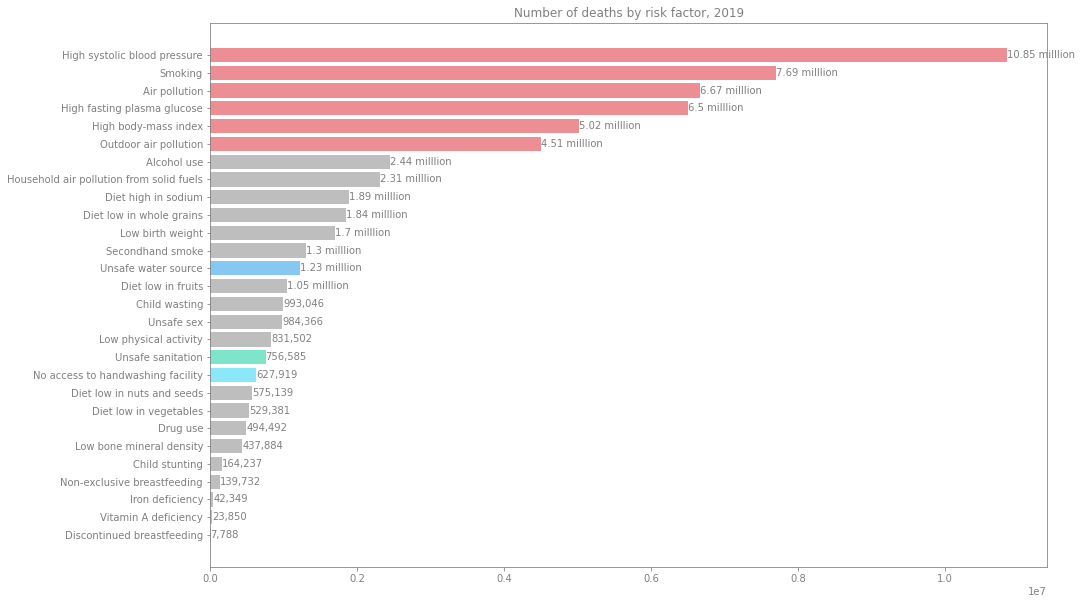

In [9]:
import re
deaths_by_risk = pd.read_csv('data/number-of-deaths-by-risk-factor.csv')
col = ['Entity','Code','Year']
#cleaning column names
for column in deaths_by_risk:
    if(column not in col):
        risk = re.search('Risk: .+?(?= -)',column).group(0)
        risk = risk.replace('Risk: ','')
        col.append(risk)

deaths_by_risk.columns = col
deaths_by_risk_2019 = deaths_by_risk[deaths_by_risk['Year'] == 2019]
deaths_by_risk_2019_world = deaths_by_risk_2019[deaths_by_risk_2019['Entity'] == 'World'] 
deaths_by_risk_2019_world = deaths_by_risk_2019_world.iloc[: ,3:]

deaths_by_risk_2019_world = deaths_by_risk_2019_world.transpose()
deaths_by_risk_2019_world.rename(columns={6629:'Deaths'},inplace=True)
deaths_by_risk_2019_world.sort_values(by='Deaths',inplace=True)
d_colors = ['#da1e28','#1192e8','#00cc96','#19d3f3']
bar_colors = ['#7f7f7f' for c in range(deaths_by_risk_2019_world.index.size)]
bar_colors[len(bar_colors)-6:] = [d_colors[0] for i in range(6)]
bar_colors[-13] = d_colors[1]
bar_colors[-18] = d_colors[2]
bar_colors[-19] = d_colors[3]
fig, ax  = plt.subplots(figsize = (15,10))
bars = ax.barh(y = deaths_by_risk_2019_world.index,width= deaths_by_risk_2019_world['Deaths'],color=bar_colors,alpha = 0.5)
labels = [str(round(n/1000000,2)) +' milllion' if n/1000000 > 1 else "{:,}".format(n) for n in deaths_by_risk_2019_world['Deaths']]
ax.bar_label(bars,labels=labels)
ax.set_title('Number of deaths by risk factor, 2019')
plt.show()

Source: https://ourworldindata.org/grapher/number-of-deaths-by-risk-factor

In [10]:
wat_death_pct = pd.read_csv('data/share-deaths-unsafe-water.csv')
wat_death_pct = wat_death_pct[wat_death_pct['Year'] == 2019] 
wat_death_pct.rename({wat_death_pct.columns[-1]:'Unsafe water pct'},axis = 1,inplace= True)
fig = px.choropleth(wat_death_pct,locations='Code',color="Unsafe water pct",color_continuous_scale=px.colors.sequential.turbid,
title='Share of deaths attributed to unsafe water sources, 2019',hover_name='Entity',labels={'Unsafe water pct':'%'})
fig.update_layout(height=700,title_x = 0.5)

fig.show()

Source: http://ghdx.healthdata.org/gbd-results-tool

## SDG 6.4
> By 2030, substantially increase water-use efficiency across all sectors and ensure sustainable withdrawals and supply of freshwater to address water scarcity and substantially reduce the number of people suffering from water scarcity
> -- <cite>United Nations sdg 6.1, https://sdgs.un.org/goals/goal6</cite>

A growing global population and economic shift towards more resource-intensive consumption patterns means global freshwater use has increased nearly six-fold since 1900. Rates of global freshwater use increased rapidly from the 1950s onwards, but since 2000 appears to be slowing.

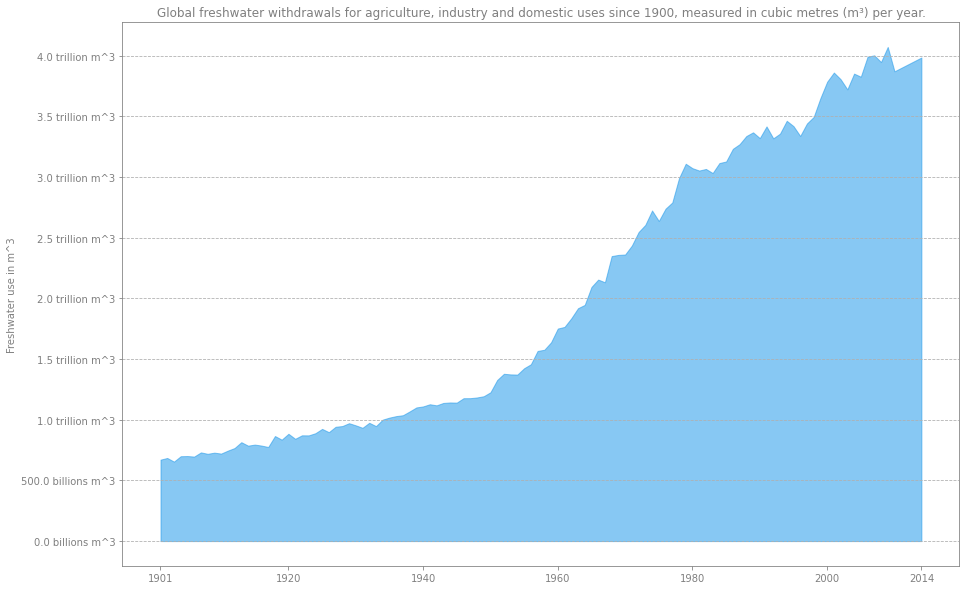

In [11]:
freshwater_use = pd.read_csv('data/Global freshwater use since 1900 - IGB.csv')
freshwater_use_world = freshwater_use[freshwater_use['Entity'] == 'World']
fig, ax = plt.subplots(figsize=(15,10))
ax.fill_between(freshwater_use_world['Year'],freshwater_use_world['Freshwater use'],color=colors[0],alpha = 0.5)
ax.set_xticks(np.concatenate((np.array([1901]),np.arange(1900,2011,20)[1:],np.array([2014]))))
ax.set_ylabel('Freshwater use in m^3')
ax.set_yticks(np.arange(0,4*(10**12)+1,500*(10**9)))
ax.set_yticklabels([str(l/(10**12))+' trillion m^3' if l/(10**12)>=1 else str(l/(10**9)) + ' billions m^3' for l in ax.get_yticks()])
ax.set_title('Global freshwater withdrawals for agriculture, industry and domestic uses since 1900, measured in cubic metres (m³) per year.')
ax.grid(axis='y',linestyle='--')
plt.show()

Source: https://github.com/owid/owid-datasets/tree/master/datasets/Global%20freshwater%20use%20since%201900%20-%20IGB

 Although absolute freshwater use has growth over this period, the distribution of uses between these regional groupings have not changed significantly over the last century.
 * OECD: countries that signed the Convention on the Organisation for Economic Co-operation and Development (members in 2010). Basically Europe, North America and Australia.
 * BRICS: Brazil, Russia, India, China and South Africa
 * ROW: Rest Of the World.

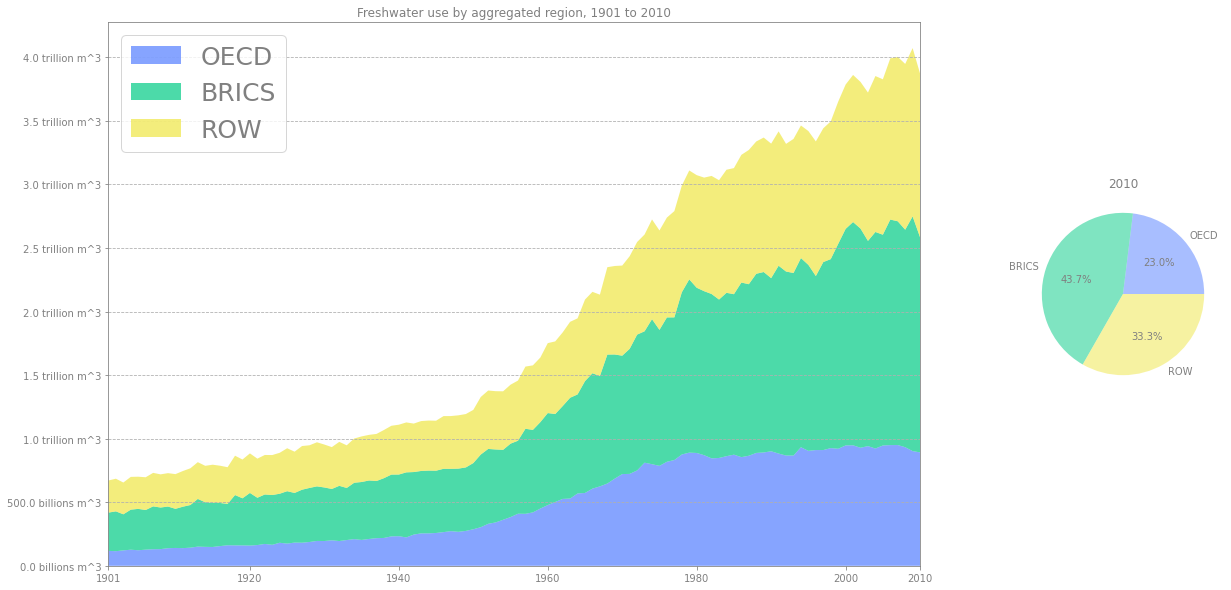

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,10),gridspec_kw={'width_ratios': [4, 1]})
freshwater_use_OECD = freshwater_use[freshwater_use['Entity'] == 'OECD']
freshwater_use_BRICS = freshwater_use[freshwater_use['Entity'] == 'BRICS']
freshwater_use_ROW = freshwater_use[freshwater_use['Entity'] == 'ROW']
ax[0].stackplot(freshwater_use_OECD['Year'],freshwater_use_OECD['Freshwater use'],freshwater_use_BRICS['Freshwater use'],freshwater_use_ROW['Freshwater use']
            ,colors = [c_colors['Europe'],c_colors['South America'],c_colors['Asia']],alpha = 0.7,
            labels=['OECD','BRICS','ROW'])
ax[0].set_xticks(np.concatenate((np.array([1901]),np.arange(1900,2011,20)[1:],np.array([2010]))))
ax[0].set_xlim(1901,2010)
ax[0].set_yticks(np.arange(0,4*(10**12)+1,500*(10**9)))
ax[0].set_yticklabels([str(l/(10**12))+' trillion m^3' if l/(10**12)>=1 else str(l/(10**9)) + ' billions m^3' for l in ax[0].get_yticks()])            
ax[0].grid(axis='y',linestyle='--')
ax[0].legend(loc='upper left',prop={'size':25})
ax[0].set_title('Freshwater use by aggregated region, 1901 to 2010')
p = ax[1].pie([freshwater_use_OECD['Freshwater use'].iloc[-1],freshwater_use_BRICS['Freshwater use'].iloc[-1],freshwater_use_ROW['Freshwater use'].iloc[-1]], 
        labels=['OECD','BRICS','ROW'], autopct='%1.1f%%',colors=[c_colors['Europe'],c_colors['South America'],c_colors['Asia']])
ax[1].set_title('2010')
for i in range(len(p[0])):
    p[0][i].set_alpha(0.5)
plt.show()

Source: Source: https://github.com/owid/owid-datasets/tree/master/datasets/Global%20freshwater%20use%20since%201900%20-%20IGB

### Water withdrawals
Water withdrawal is defined as the quantity of freshwater taken from groundwater or surface water sources (such as lakes or rivers) for use in agricultural, industrial or domestic purposes.

In [13]:
wat_with = pd.read_csv('data/water-withdrawals.csv',index_col=False)
wat_with['Code'] = [row['Area'][0:3] for index, row in wat_with.iterrows()]
wat_with['Area'] = [row['Area'][4:] for index, row in wat_with.iterrows()]
wat_with_total = wat_with[wat_with['Variable Name'] == 'Total freshwater withdrawal']
bins = [0.5,1,5,7.5,10,50,100,400,800]
wat_with_total_2018 = wat_with_total[wat_with_total['Year']== 2018]
wat_with_total_2018 = wat_with_total_2018.sort_values('Value')
fig = px.choropleth(wat_with_total_2018,locations='Code',color=pd.cut(wat_with_total_2018['Value'],bins=bins),color_discrete_sequence=px.colors.sequential.Blues,
title='Total Water withdrawals (billons of m^3), 2018',hover_name='Area',hover_data=['Value'],labels={'color':'10^9 m^3'})
fig.update_layout(height=700,title_x = 0.5)
fig.show()

Source: https://www.fao.org/aquastat/statistics/query/index.html UN FAO Aquastat Database

### Water withdrawals per capita

In [14]:

wat_with_total_pc = wat_with[wat_with['Variable Name'] == 'Total water withdrawal per capita']
fig = px.choropleth(wat_with_total_pc[wat_with_total_pc['Year']== 2018],locations='Code',color="Value",color_continuous_scale=px.colors.sequential.Purples,
title='Total Water withdrawals per capita (m^3), 2018',range_color=[0,1500],hover_name='Area',labels={'Value':'m^3'})
fig.update_layout(height=700,title_x = 0.5)

fig.show()

Source: https://www.fao.org/aquastat/statistics/query/index.html UN FAO Aquastat Database

As seen, there is large variance in levels of water withdrawal across the world – this can depend on a range of factors, including latitude, climate, and the importance of a country’s agricultural or industrial sector. Looking at the trends over time of some countries better visualizes how the situation is evolving. 

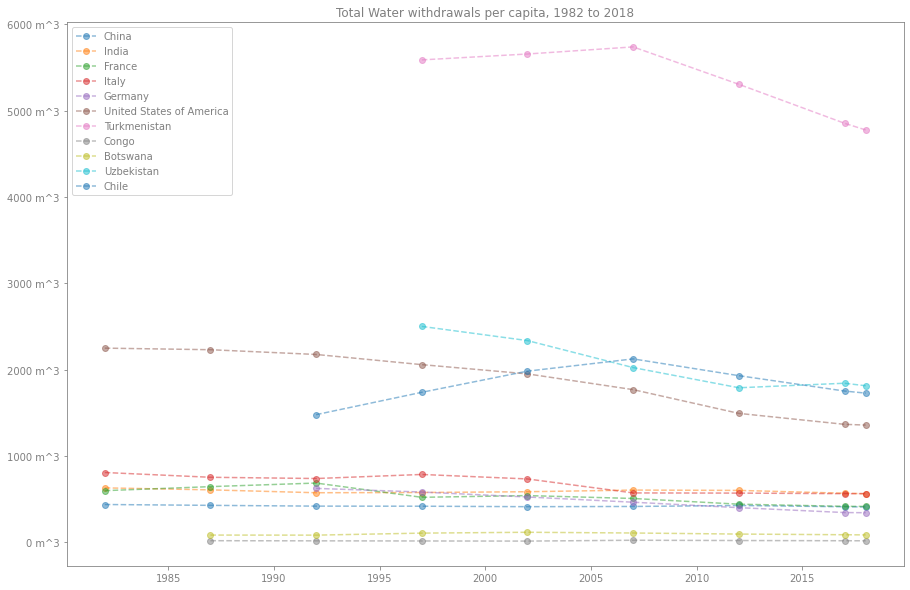

In [15]:
def plot_by_countries(ax,countries,df,country_col,xcol,ycol):

    for i in range(len(countries)):
        df_c = df[df[country_col]==countries[i]]
        ax.plot(df_c[xcol],df_c[ycol],marker='o',linestyle='dashed',label=countries[i],alpha = 0.5)
        ax.legend()
countries = ['China','India','France','Italy','Germany','United States of America','Turkmenistan','Congo','Botswana','Uzbekistan','Chile']

fig, ax = plt.subplots(figsize=(15,10))
plot_by_countries(ax,countries,wat_with_total_pc,'Area','Year','Value')
ax.set_title('Total Water withdrawals per capita, 1982 to 2018')
ax.set_yticks(np.linspace(0,6000,7))
ax.set_yticklabels([str(int(t)) + ' m^3' for t in ax.get_yticks()])
plt.show()

Source: https://www.fao.org/aquastat/statistics/query/index.html UN FAO Aquastat Database

In the plot below we can see that worldwide, 71% of the annual water withdrawal is used in agriculture, 16% for industrial puposes and 11% for municipal purposes.
Water is used for a range of industrial applications, including dilution, steam generation, washing, and cooling of manufacturing equipment. Industrial water is also used as cooling water for energy generation in fossil fuel and nuclear power plants (hydropower generation is not included in this category), or as wastewater from certain industrial processes.
Municipal water is defined as the water we use for domestic, household purposes or public services. This is typically the most ‘visible’ form of water: the water we use for drinking, cleaning, washing, and cooking.

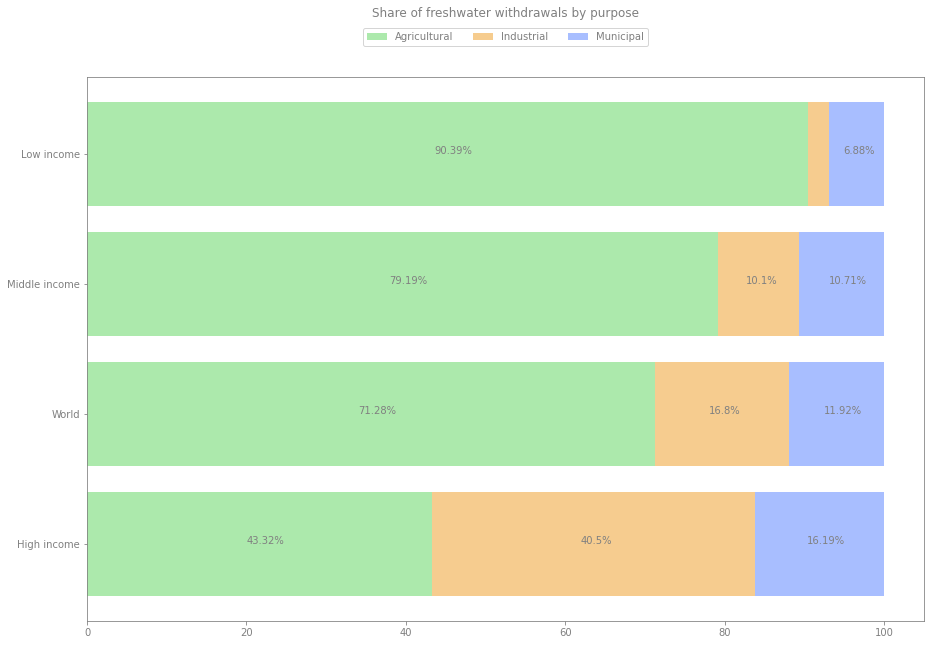

In [16]:
wwi = pd.read_csv('data/water-withdrawals-purposes.csv').dropna()
colors = ['#5ad45a','#ef9b20','#537eff']
labels = ['Agricultural','Industrial','Municipal']
wwi['2017 [YR2017]'] = wwi['2017 [YR2017]'].apply(pd.to_numeric, errors='coerce')
wwi['2018 [YR2018]'] = wwi['2018 [YR2018]'].apply(pd.to_numeric, errors='coerce')
wit_classes = {"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)":"wat_ag","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)":"wat_dom",
"Annual freshwater withdrawals, industry (% of total freshwater withdrawal)":"wat_in","Annual freshwater withdrawals, total (% of internal resources)":"wat_with_res",
"Renewable internal freshwater resources per capita (cubic meters)":"wat_ren_cap"}
columns = ['Country Name','Year']+list(wit_classes.values())
wwi_renamed = pd.DataFrame(columns = columns)

for index, row in wwi.iterrows():
    wwi.at[index,'Series Name'] = wit_classes[row['Series Name']]
for c in wwi['Country Name'].unique():
    d = wwi[wwi['Country Name'] == c]
    data = [[d['Country Name'].unique()[0],2017]+list(d['2017 [YR2017]']),[d['Country Name'].unique()[0],2018]+list(d['2018 [YR2018]'])]
    wwi_renamed = pd.concat([wwi_renamed,pd.DataFrame(data=data,columns=columns)])
wwi_2017 = wwi_renamed[wwi_renamed['Year'] == 2017].sort_values('wat_ag')
fig, ax = plt.subplots(figsize = (15,10))
water_uses = ['wat_ag','wat_in','wat_dom']
for i in range(3):
    if i == 0:
        previous_bar = None
    if i == 1:
        previous_bar = np.array(wwi_2017[water_uses[0]])
    if i > 1:
        previous_bar += np.array(wwi_2017[water_uses[i-1]])
    b = ax.barh(wwi_2017['Country Name'], wwi_2017[water_uses[i]],color=colors[i], left = previous_bar,alpha=0.5,label=labels[i])
    ax.legend(loc='upper center',ncol=5,labelcolor='grey',bbox_to_anchor=(0.5,1.1))
    ax.set_title('Share of freshwater withdrawals by purpose',y= 1.1)
    
    for bar in b.patches:
        width = bar.get_width()
        if width>5:
            ax.annotate('{}%'.format(width.round(2)),
            xy=(bar.get_x() + width/2, bar.get_y()+bar.get_height()/2),
            xytext=(-13, 0),
            textcoords="offset points",
            color='grey') 
plt.show()

Source: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

To mantain sustainable levels of water resources, rates of water withdrawal must be below rates of freshwater replenishment. Renewable freshwater resources include river flows and groundwater from rainfall.

In [17]:
ws = pd.read_csv('data/water-stress.csv')
columns = ['Country Name','Code','Year','wat_res','wat_ren_cap']
ws_renamed = pd.DataFrame(columns= columns)
for c in ws['Country Name'].unique():
    d = ws[ws['Country Name'] == c]
    data = [[d['Country Name'].unique()[0],d['Country Code'].unique()[0],y[0:4]]+list(d[y]) for y in ws.iloc[:,4:].columns]
    ws_renamed = pd.concat([ws_renamed,pd.DataFrame(data=data,columns=columns)])
ws_renamed.loc[:,'Year'] = ws_renamed['Year'].apply(pd.to_numeric, errors='coerce')
ws_renamed.loc[:,'wat_res'] = ws_renamed['wat_res'].apply(pd.to_numeric, errors='coerce')
ws_renamed.loc[:,'wat_ren_cap'] = ws_renamed['wat_ren_cap'].apply(pd.to_numeric, errors='coerce')
bins = [0,500,1000,5000,10000,50000,100000,500000]
wat_ren_cap_2018 = ws_renamed[(ws_renamed['Year'] == 2018)]
wat_ren_cap_2018 = wat_ren_cap_2018.sort_values('wat_ren_cap')
fig = px.choropleth(wat_ren_cap_2018,locations='Code',color=pd.cut(wat_ren_cap_2018['wat_ren_cap'],bins=bins),color_discrete_sequence=px.colors.sequential.YlGnBu,
title='Renewable freshwater resources per capita (m^3), 2018',hover_name='Country Name',hover_data=['wat_ren_cap'],labels={'color':'m^3'})
fig.update_layout(height=700,title_x = 0.5)

fig.show()

Source: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

As we see below, per capita renewable resources are declining as a result of population increases. If renewable resources decline — as can happen frequently in countries with large annual variability in rainfall — then per capita renewable withdrawals will also fall. 

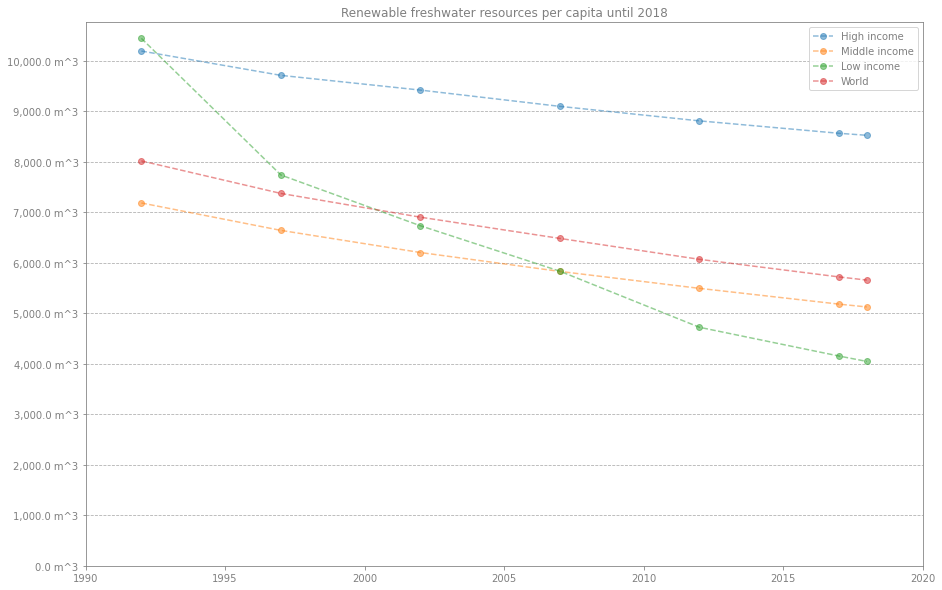

In [18]:
countries = ['High income','Middle income','Low income','World']
fig, ax = plt.subplots(figsize=(15,10))
plot_by_countries(ax,countries,ws_renamed[ws_renamed['wat_ren_cap'].notna()],'Country Name','Year','wat_ren_cap')
ax.grid(axis='y',linestyle='--')
ax.set_title('Renewable freshwater resources per capita until 2018')
ax.set_yticks(np.linspace(0,10000,11))
ax.set_yticklabels(["{:,}".format(t) + ' m^3' for t in ax.get_yticks()])
ax.set_xticks(np.concatenate(ax.get_xticks(),np.array(2018)))
plt.show()

Source: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

Water stress is measured based on freshwater withdrawals as a share of internal (renewable) resources.
The World Resources Institute categorise water stress in the following ways: if withdrawals are less than 10 percent of resources then a country has low water stress; 10-20 percent is low-to-medium stress; 20-40 percent medium-to-high; 40-80 percent high stress; and greater than 80 percent is extremely high stress.

In [19]:
water_stress_2017 = ws_renamed[ws_renamed['Year'] == 2017]
water_stress_2017 = water_stress_2017[water_stress_2017['wat_res'].notna()]
water_stress_2017 = water_stress_2017.sort_values('wat_res')

bins = [0,10,20,40,80,water_stress_2017['wat_res'].max()]
color_sq = ['#ffffb2','#fecc5c','#fd8d3c','#f03b20','#bd0026']
names = ['Low stress','Low-to-medium stess','Medium-to-high stess','High stress','Extremely high stress']
fig = px.choropleth(water_stress_2017,locations='Code',color=pd.cut(water_stress_2017['wat_res'],bins=bins,labels=names),color_discrete_sequence=color_sq,
title='Freshwater withdrawals as share of internal resources, 2017',hover_name='Country Name',hover_data=['wat_res'],labels={'color':'m^3'})
fig.update_layout(height=700,title_x = 0.5)

fig.show()

Source: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators

In some regions the water stress remains constant over the years, while others are able to diminish it, probably due to better infrastructures or technologies that reduce waste. Some regions like Algeria see their water stress increase due to population increase. Spikes like in Netherlands can be related to rainfall shortage/drought

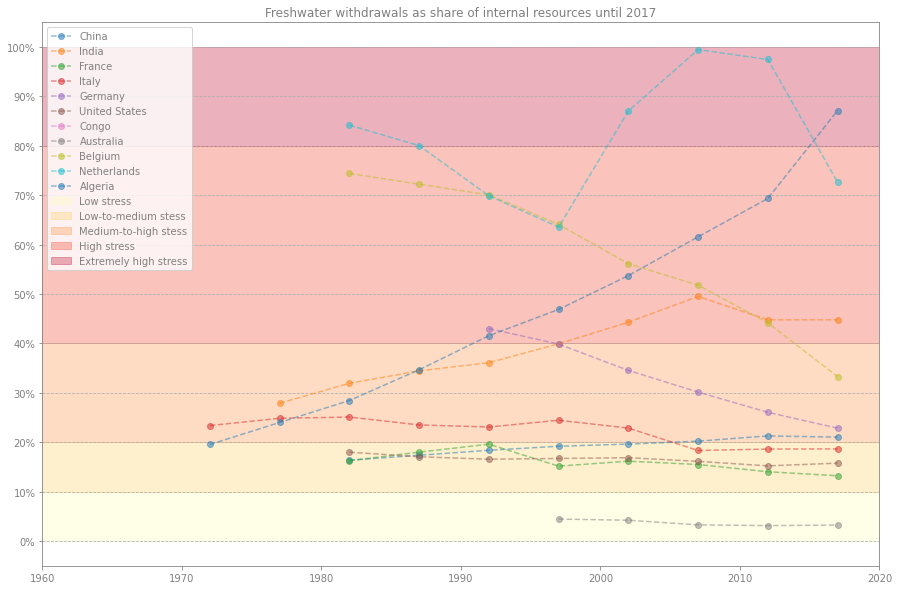

In [60]:
countries = ['China','India','France','Italy','Germany','United States','Congo','Australia','Belgium','Netherlands','Algeria']
fig, ax = plt.subplots(figsize=(15,10))
plot_by_countries(ax,countries,ws_renamed[ws_renamed['wat_res'].notna()],'Country Name','Year','wat_res')
ax.grid(axis='y',linestyle='--')
ax.set_title('Freshwater withdrawals as share of internal resources until 2017')
ax.set_yticks(np.linspace(0,100,11))
ax.set_yticklabels(["{}%".format(int(t)) for t in ax.get_yticks()])
ax.set_xticks(np.concatenate(ax.get_xticks(),np.array(2018)))
for i in range(5):
    end = bins[i+1]
    if i == 4:
        end = 100
    ax.axhspan(bins[i],end,color = color_sq[i],alpha = 0.3,label=names[i])

ax.legend()
plt.show()

Source: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators